In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [59]:
df=pd.read_csv('1730285881-Airbnb_Open_Data.csv')

C:\Users\lenovo\AppData\Local\Temp\ipykernel_33168\95517816.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('1730285881-Airbnb_Open_Data.csv')


In [61]:
df

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,19-10-2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,21-05-2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,05-07-2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,19-11-2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,...,$169,1.0,0.0,NaN,NaN,3.0,1.0,227.0,No Smoking No Parties or Events of any kind Pl...,NaN
102595,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,...,$167,1.0,1.0,06-07-2015,0.02,2.0,2.0,395.0,House rules: Guests agree to the following ter...,NaN
102596,6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,...,$198,3.0,0.0,NaN,NaN,5.0,1.0,342.0,NaN,NaN
102597,6094094,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,...,$109,2.0,5.0,11-10-2015,0.10,3.0,1.0,386.0,NaN,NaN


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [66]:
df.duplicated().value_counts()

False    102058
True        541
Name: count, dtype: int64

In [68]:
original_columns = df.columns.tolist()
df.columns = [c.strip().lower().replace(' ', '_') for c in df.columns]
print(df.head())
print(df.shape)
print(df.dtypes)

        id                                              name      host_id  \
0  1001254                Clean & quiet apt home by the park  80014485718   
1  1002102                             Skylit Midtown Castle  52335172823   
2  1002403               THE VILLAGE OF HARLEM....NEW YORK !  78829239556   
3  1002755                                               NaN  85098326012   
4  1003689  Entire Apt: Spacious Studio/Loft by central park  92037596077   

  host_identity_verified host_name neighbourhood_group neighbourhood  \
0            unconfirmed  Madaline            Brooklyn    Kensington   
1               verified     Jenna           Manhattan       Midtown   
2                    NaN     Elise           Manhattan        Harlem   
3            unconfirmed     Garry            Brooklyn  Clinton Hill   
4               verified    Lyndon           Manhattan   East Harlem   

        lat      long        country  ... service_fee minimum_nights  \
0  40.64749 -73.97237  United St

In [70]:
print('Loaded dataset, standardized columns, and displayed head/shape/dtypes')
     

Loaded dataset, standardized columns, and displayed head/shape/dtypes


In [72]:
for col in ['price', 'service_fee']:
    if col in df.columns:
        df[col] = df[col].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False).str.strip()
        df[col] = pd.to_numeric(df[col], errors='coerce')

In [74]:
numeric_guess = ['lat','long','construction_year','minimum_nights','number_of_reviews','reviews_per_month','review_rate_number','calculated_host_listings_count','availability_365']
for col in numeric_guess:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')


In [76]:
missing_summary = df.isna().sum().sort_values(ascending=False)
describe_summary = df.describe(include='all').transpose()

In [78]:
print(missing_summary.head(20))
print(describe_summary.head(15))
print('Cleaned numeric columns, computed missing values and descriptive stats')

license                           102597
house_rules                        52131
last_review                        15893
reviews_per_month                  15879
country                              532
availability_365                     448
minimum_nights                       409
host_name                            406
review_rate_number                   326
calculated_host_listings_count       319
host_identity_verified               289
service_fee                          273
name                                 250
price                                247
construction_year                    214
number_of_reviews                    183
country_code                         131
instant_bookable                     105
cancellation_policy                   76
neighbourhood_group                   29
dtype: int64
                           count unique                  top    freq  \
id                      102599.0    NaN                  NaN     NaN   
name                   

In [80]:
print(df.head())

        id                                              name      host_id  \
0  1001254                Clean & quiet apt home by the park  80014485718   
1  1002102                             Skylit Midtown Castle  52335172823   
2  1002403               THE VILLAGE OF HARLEM....NEW YORK !  78829239556   
3  1002755                                               NaN  85098326012   
4  1003689  Entire Apt: Spacious Studio/Loft by central park  92037596077   

  host_identity_verified host_name neighbourhood_group neighbourhood  \
0            unconfirmed  Madaline            Brooklyn    Kensington   
1               verified     Jenna           Manhattan       Midtown   
2                    NaN     Elise           Manhattan        Harlem   
3            unconfirmed     Garry            Brooklyn  Clinton Hill   
4               verified    Lyndon           Manhattan   East Harlem   

        lat      long        country  ... service_fee minimum_nights  \
0  40.64749 -73.97237  United St

In [82]:
num_cols = []
for c in ['minimum_nights','number_of_reviews','review_rate_number','availability_365']:
    if c in df.columns:
        num_cols.append(c)

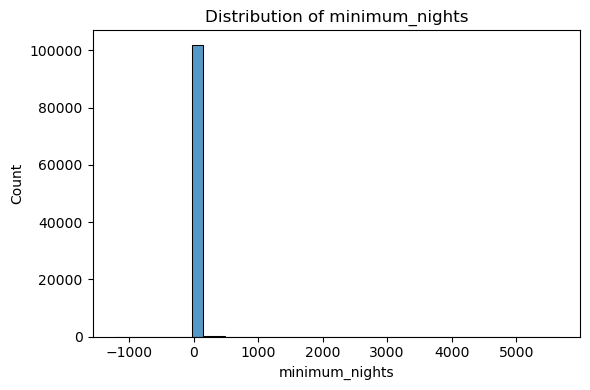

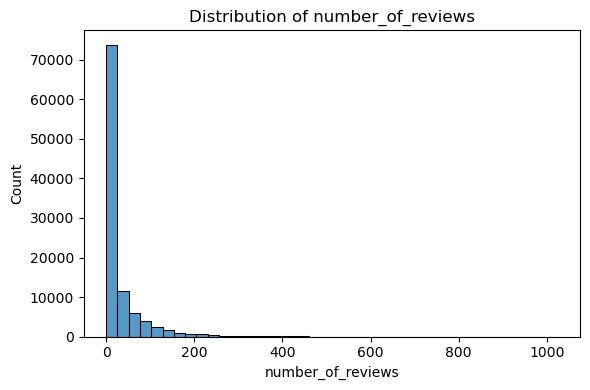

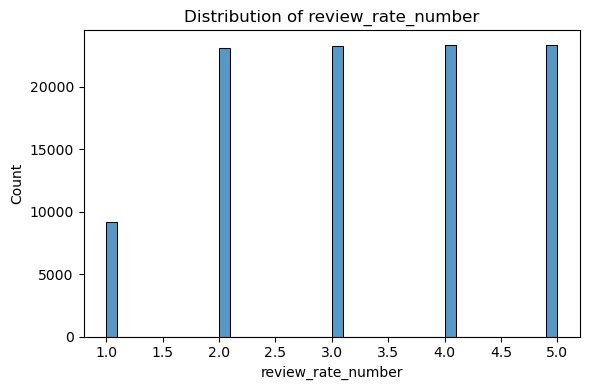

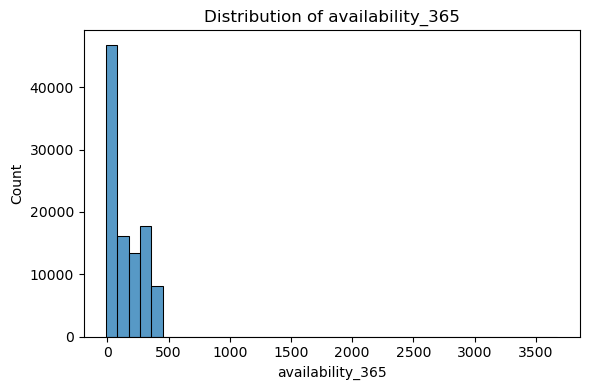

In [86]:
for c in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[c].dropna(), bins=40, kde=False)
    plt.title('Distribution of ' + c)
    plt.xlabel(c)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

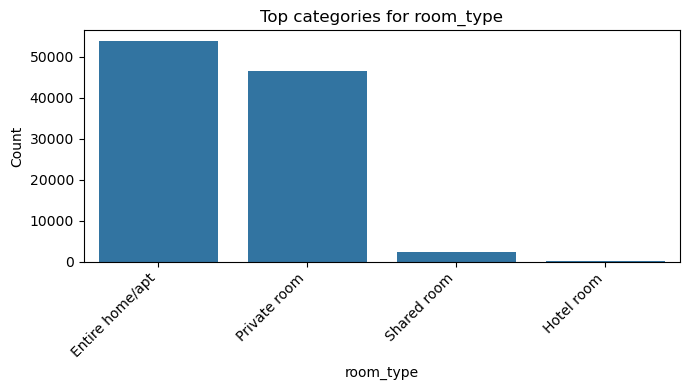

Plotted univariate distributions and categorical bars


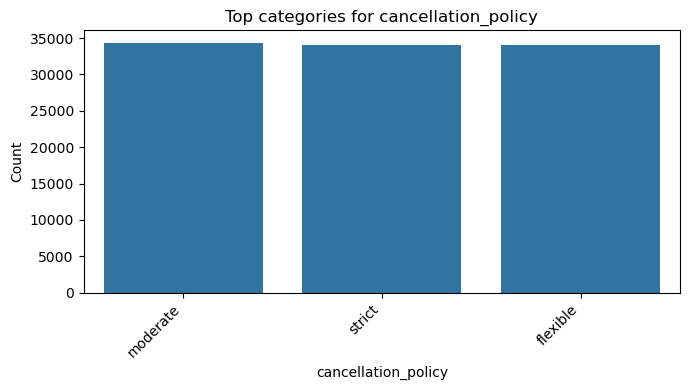

Plotted univariate distributions and categorical bars


In [94]:
for c in ['property_type','room_type','cancellation_policy']:
    if c in df.columns:
        plt.figure(figsize=(7,4))
        counts = df[c].value_counts().head(20)
        sns.barplot(x=counts.index, y=counts.values)
        plt.title('Top categories for ' + c)
        plt.ylabel('Count')
        plt.xlabel(c)
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
        print('Plotted univariate distributions and categorical bars')